In [69]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16,9)
plt.style.use('ggplot')
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.utils.class_weight import compute_class_weight
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont

In [71]:
base_conocimiento_hs = pd.read_csv(r"hematoma(banco).csv", delimiter=";")

In [73]:
base_conocimiento_hs.shape

(99, 129)

In [75]:
base_conocimiento_hs.head()

,NOMBRE,HISTORIA CLÍNICA,EDAD,≤ 60,60 - 70,71 - 80,81 - 90,>90,SEXO,ANTECEDENTES DE TRAUMA CRANEAL,...,ESCALA DE EVALUACIÓN DE RESULTADOS DE GLASGOW 1,ESCALA DE EVALUACIÓN DE RESULTADOS DE GLASGOW 2,ESCALA DE EVALUACIÓN DE RESULTADOS DE GLASGOW 3,ESCALA DE EVALUACIÓN DE RESULTADOS DE GLASGOW 4,ESCALA DE EVALUACIÓN DE RESULTADOS DE GLASGOW 5,REINTERVENCIÓ0N,ESTADO AL EGRESO,LOCALIZACIÓN DERECHO,LOCALIZACIÓN IZQUIERDO,LOCALIZACIÓN BILATERAL
0,ELÍAS LLORENTE GARCÍA,278196,61.0,0.0,1.0,0.0,0.0,0.0,1,1,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,ROLANDO LOPEZ CASTILLO,278376,89.0,0.0,0.0,0.0,1.0,0.0,1,1,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
2,JOSÉ LORENZO GONZALES MOYA,278740,65.0,0.0,1.0,0.0,0.0,0.0,1,1,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,NELSON SARAGOSI QUIÑONES,278823,71.0,0.0,0.0,1.0,0.0,0.0,1,1,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,LEONARDO BAIZAN ROMERO,278918,61.0,0.0,1.0,0.0,0.0,0.0,1,0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0


In [77]:
base_conocimiento_hs.groupby('ESTADO AL EGRESO').size()

ESTADO AL EGRESO
0.0    24
1.0    73
dtype: int64

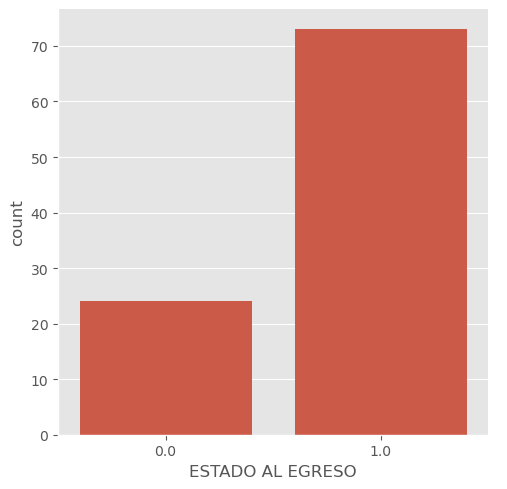

In [79]:
sb.catplot(data=base_conocimiento_hs, x='ESTADO AL EGRESO',kind="count")
plt.show()

In [81]:
media_edad = base_conocimiento_hs['EDAD'].mean()
desviacion_estandar_edad = base_conocimiento_hs['EDAD'].std()
edades_nulas = base_conocimiento_hs['EDAD'].isnull().sum()
lista_edades_nuevas = np.random.randint(media_edad - desviacion_estandar_edad, media_edad + desviacion_estandar_edad, size=edades_nulas)

lista_valores_nulos = np.isnan(base_conocimiento_hs['EDAD'])

lista_valores_nulos = [float(valor) for valor in lista_valores_nulos]

base_conocimiento_hs.loc[np.isnan(base_conocimiento_hs['EDAD']), 'EDAD'] = lista_valores_nulos
base_conocimiento_hs['EDAD'] = base_conocimiento_hs['EDAD'].astype(int)

print("Edad Promedio: " + str(media_edad))
print("Desviacion estándar edad: " + str(desviacion_estandar_edad))
print("Intervalo para asignar edad aleatoria: " + str(int(media_edad - desviacion_estandar_edad)) + " a " + str(int(media_edad + desviacion_estandar_edad)))

ValueError: Must have equal len keys and value when setting with an iterable

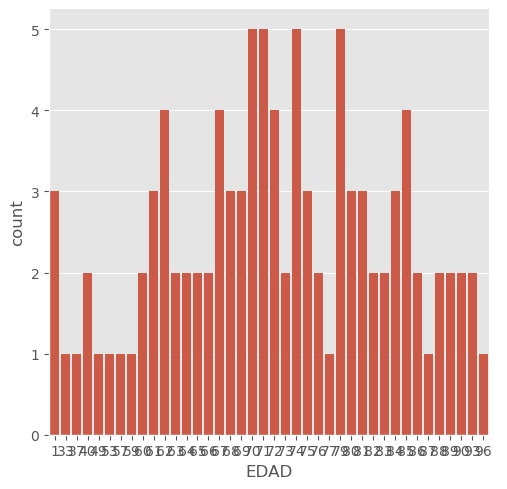

In [49]:
sb.catplot(data=base_conocimiento_hs, x='EDAD',kind="count")
plt.show()

In [51]:
print (base_conocimiento_hs.columns)

Index(['NOMBRE', 'HISTORIA CLÍNICA ', 'EDAD', '≤ 60 ', '60 - 70', '71 - 80',
       '81 - 90', '>90', 'SEXO', 'ANTECEDENTES DE TRAUMA CRANEAL',
       ...
       'ESCALA DE EVALUACIÓN DE RESULTADOS DE GLASGOW 1',
       'ESCALA DE EVALUACIÓN DE RESULTADOS DE GLASGOW 2',
       'ESCALA DE EVALUACIÓN DE RESULTADOS DE GLASGOW 3',
       'ESCALA DE EVALUACIÓN DE RESULTADOS DE GLASGOW 4',
       'ESCALA DE EVALUACIÓN DE RESULTADOS DE GLASGOW 5', 'REINTERVENCIÓ0N',
       'ESTADO AL EGRESO', 'LOCALIZACIÓN DERECHO', 'LOCALIZACIÓN IZQUIERDO',
       'LOCALIZACIÓN BILATERAL'],
      dtype='object', length=129)


In [53]:
drop_elements = ['NOMBRE','HISTORIA CLÍNICA ','EDAD','VOLUMEN DEL HEMATOMA','DIÁMETRO DE LA CAPA','DESVIACIÓN DE LÍNEA MEDIA','DIÁMETRO MAYOR TRANSVERSO']
base_conocimiento_hs_corregida = base_conocimiento_hs.drop(drop_elements, axis = 1)

base_conocimiento_hs_corregida.dropna()

,≤ 60,60 - 70,71 - 80,81 - 90,>90,SEXO,ANTECEDENTES DE TRAUMA CRANEAL,"FACTOR DE RIESGO 1 1,\tAlcoholismo","FACTOR DE RIESGO 2 2,\tInsuficiencia renal crónica",FACTOR DE RIESGO 3 Inmunosupresión,...,ESCALA DE EVALUACIÓN DE RESULTADOS DE GLASGOW 1,ESCALA DE EVALUACIÓN DE RESULTADOS DE GLASGOW 2,ESCALA DE EVALUACIÓN DE RESULTADOS DE GLASGOW 3,ESCALA DE EVALUACIÓN DE RESULTADOS DE GLASGOW 4,ESCALA DE EVALUACIÓN DE RESULTADOS DE GLASGOW 5,REINTERVENCIÓ0N,ESTADO AL EGRESO,LOCALIZACIÓN DERECHO,LOCALIZACIÓN IZQUIERDO,LOCALIZACIÓN BILATERAL
0,0.0,1.0,0.0,0.0,0.0,1,1,0,0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,1,1,0,0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1,1,0,0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,1,1,0,0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,1,0,0,0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,1.0,0.0,0.0,0.0,0.0,0,0,0,0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
93,0.0,0.0,0.0,1.0,0.0,0,1,0,0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
94,1.0,0.0,0.0,0.0,0.0,1,0,0,0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
95,0.0,0.0,1.0,0.0,0.0,1,0,0,0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [67]:
cv = KFold(n_splits=10) # Numero deseado de "folds" que haremos
accuracies = list()
max_attributes = len(list(base_conocimiento_hs_corregida))
depth_range = range(1, max_attributes + 1)

# Testearemos la profundidad de 1 a cantidad de atributos +1
for depth in depth_range:
    fold_accuracy = []
    tree_model = tree.DecisionTreeClassifier(criterion='entropy',
                                             min_samples_split=20,
                                             min_samples_leaf=5,
                                             max_depth = depth,
                                             class_weight={0.0: class_weights[3], 1.0: class_weights[1]})
    for train_fold, valid_fold in cv.split(base_conocimiento_hs_corregida):
        f_train = base_conocimiento_hs_corregida.loc[train_fold] 
        f_valid = base_conocimiento_hs_corregida.loc[valid_fold] 

        #print(f_train["ESTADO AL EGRESO"].isnull().sum())
        f_train = f_train.dropna(subset=["ESTADO AL EGRESO"])
        f_valid = f_valid.dropna(subset=["ESTADO AL EGRESO"])

        model = tree_model.fit(X = f_train.drop(['ESTADO AL EGRESO'], axis=1), 
                               y = f_train["ESTADO AL EGRESO"]) 
        valid_acc = model.score(X = f_valid.drop(['ESTADO AL EGRESO'], axis=1), 
                                y = f_valid["ESTADO AL EGRESO"]) # calculamos la precision con el segmento de validacion
        fold_accuracy.append(valid_acc)

    avg = sum(fold_accuracy)/len(fold_accuracy)
    accuracies.append(avg)
    
# Mostramos los resultados obtenidos
df = pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": accuracies})
df = df[["Max Depth", "Average Accuracy"]]
print(df.to_string(index=False))

NameError: name 'class_weights' is not defined

In [ ]:
# Crear arrays de entrenamiento y las etiquetas que indican si llegó a top o no 
y_train = base_conocimiento_hs_corregida['ESTADO AL EGRESO']
x_train = base_conocimiento_hs_corregida.drop(['ESTADO AL EGRESO'], axis=1).values 

# Crear Arbol de decision con profundidad = 4
decision_tree = tree.DecisionTreeClassifier(criterion='entropy',
                                            min_samples_split=20,
                                            min_samples_leaf=5,
                                            max_depth = 4,
                                            class_weight={3:1})
decision_tree.fit(x_train, y_train)

# exportar el modelo a archivo .dot
with open(r"tree1.dot", 'w') as f:
     f = tree.export_graphviz(decision_tree,
                              out_file=f,
                              max_depth = 7,
                              impurity = True,
                              feature_names = list(artists_encoded.drop(['top'], axis=1)),
                              class_names = ['No', 'N1 Billboard'],
                              rounded = True,
                              filled= True )
        
# Convertir el archivo .dot a png para poder visualizarlo
check_call(['dot','-Tpng',r'tree1.dot','-o',r'tree1.png'])
PImage("tree1.png")